# Interactive Plots

In [1]:
import pandas as pd
import altair as alt

In [3]:
sample = pd.read_csv("../data/sample.csv")

In [4]:
sample

,area,sales,profit
0,North,5,2
1,East,25,8
2,West,15,6
3,South,20,5
4,Central,10,3


### Selection

In [10]:

base = alt.Chart(sample).mark_bar().encode(
    x="area:N",
    y="sales:Q"
)


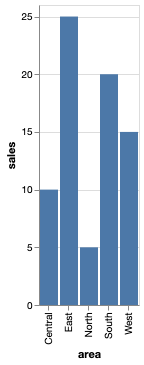

In [9]:
base

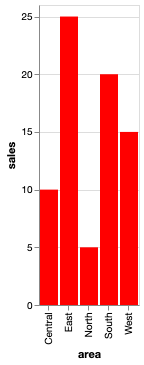

In [13]:
selection = alt.selection_single()

base.add_selection(selection).encode(
    color=alt.condition(selection, alt.value("red"), alt.value("blue"))
)

In [20]:

def plot(selection):
    return alt.Chart(sample).mark_circle(size=200).add_selection(
            selection
            ).encode(
            x="sales",
            y="profit",
            color = alt.condition(selection, "area", alt.value("grey")),
            opacity = alt.condition(selection, alt.value(0.8), alt.value(0.3))
            ).properties(width=240, height=180)
    

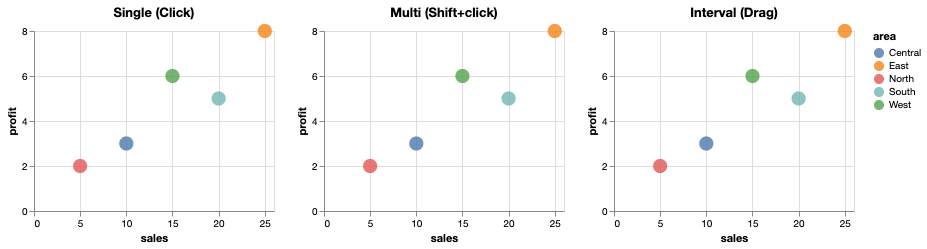

In [21]:
alt.hconcat(
    plot(alt.selection_single()).properties(title="Single (Click)"),
    plot(alt.selection_multi()).properties(title="Multi (Shift+click)"),
    plot(alt.selection_interval()).properties(title="Interval (Drag)"),
)

### Dynamic Queries

In [22]:
churn = pd.read_csv("../data/churn.csv")
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [32]:
values = [i for i in churn.Churn.unique() if i]

In [33]:
values

['No', 'Yes']

In [34]:
churn.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [36]:
selectChurn = alt.selection_single(
    name = "Select",
    fields = ['Churn'],
    init = {'Churn':values[0]},
    bind = alt.binding_select(options=values)
)

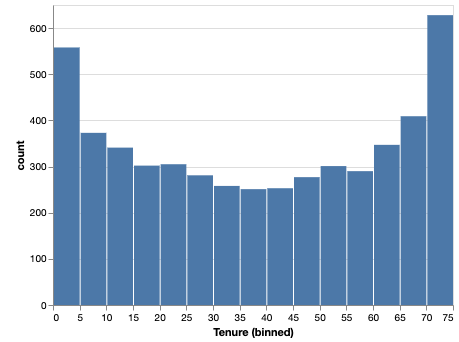

In [37]:
alt.Chart(churn).mark_bar().add_selection(
    selectChurn
).encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=25)),
    alt.Y("count()", title="count")
).transform_filter(selectChurn)

### Cross filtering

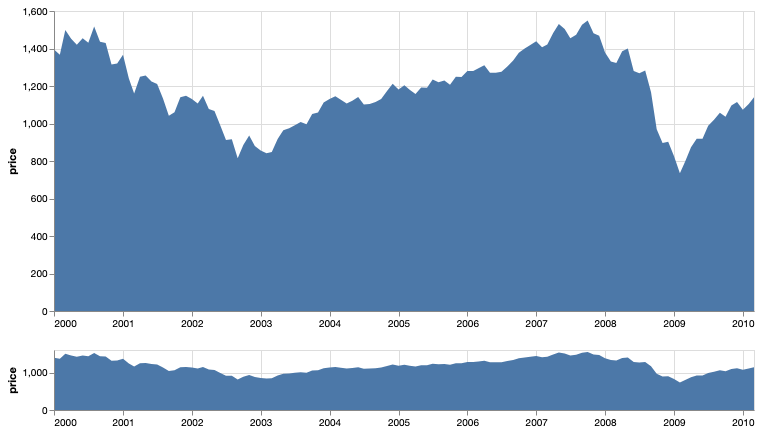

In [39]:
sp500 = "https://vega.github.io/vega-datasets/data/sp500.csv"
from vega_datasets import data
sp500 = data.sp500()

brush = alt.selection_interval(encodings=['x'])
base = alt.Chart().mark_area().encode(
    alt.X("date:T", title=None),
    alt.Y("price:Q")
).properties(
    width=700
)

chart = alt.vconcat(
    base.encode(alt.X("date:T", title=None, scale=alt.Scale(domain=brush))),
    base.add_selection(brush).properties(height=60),
    data=sp500
)
chart